In [50]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2

In [51]:
train_dir='/kaggle/input/chest-xray-pneumonia/chest_xray/train'
val_dir='/kaggle/input/chest-xray-pneumonia/chest_xray/val'
test_dir='/kaggle/input/chest-xray-pneumonia/chest_xray/test'

In [52]:
os.path.exists(train_dir)

True

In [53]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-02-04 06:02:42--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: 'helper_functions.py.2'

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-02-04 06:02:42 (55.2 MB/s) - 'helper_functions.py.2' saved [10246/10246]



In [54]:
from helper_functions import *

In [55]:
walk_through_dir('/kaggle/input/chest-xray-pneumonia/chest_xray')

There are 5 directories and 0 images in '/kaggle/input/chest-xray-pneumonia/chest_xray'.
There are 3 directories and 1 images in '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray'.
There are 2 directories and 1 images in '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val'.
There are 0 directories and 9 images in '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA'.
There are 0 directories and 9 images in '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/NORMAL'.
There are 2 directories and 1 images in '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test'.
There are 0 directories and 390 images in '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/PNEUMONIA'.
There are 0 directories and 234 images in '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL'.
There are 2 directories and 1 images in '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train'.
There are 0 directories and 3876 images 

In [56]:
from tensorflow import keras as ks

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization,MaxPool2D,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [58]:
data_aug=ImageDataGenerator(
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
    tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
    tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
)

In [59]:
train=data_aug.flow_from_directory(directory=train_dir,target_size=(224,224),batch_size=32,class_mode="binary")
test=data_aug.flow_from_directory(directory=test_dir,target_size=(224,224),batch_size=32,class_mode="binary")
val=data_aug.flow_from_directory(directory=val_dir,target_size=(224,224),batch_size=32,class_mode="binary")

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [60]:
train

In [61]:
from tensorflow.keras import Sequential

In [62]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'selu' , input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'selu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'selu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'selu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'selu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'selu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_6 (Bat  (None, 224, 224, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 dropout_4 (Dropout)         (None, 112, 112, 64)      0         
                                                                 
 batch_normalization_7 (Bat  (None, 112, 112, 64)    

In [63]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
history = model.fit( train, batch_size = 32 ,epochs = 12 , validation_data =val ,callbacks = [learning_rate_reduction])

Epoch 1/12


2024-02-04 06:02:57.336015: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_10/dropout_4/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


163/163 [==============================] - 58s 340ms/step - loss: 0.6824 - accuracy: 0.8627 - val_loss: 3.8262 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 2/12
163/163 [==============================] - 54s 329ms/step - loss: 0.1499 - accuracy: 0.9438 - val_loss: 2.7789 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 3/12
163/163 [==============================] - 55s 334ms/step - loss: 0.1143 - accuracy: 0.9630 - val_loss: 0.2315 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 4/12
163/163 [==============================] - 53s 327ms/step - loss: 0.0915 - accuracy: 0.9693 - val_loss: 0.3796 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 5/12
163/163 [==============================] - 54s 330ms/step - loss: 0.0962 - accuracy: 0.9718 - val_loss: 0.1611 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 6/12
163/163 [==============================] - 54s 332ms/step - loss: 0.0674 - accuracy: 0.9791 - val_loss: 0.2514 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 7/12
163/163 [==============================] - ETA: 0s -

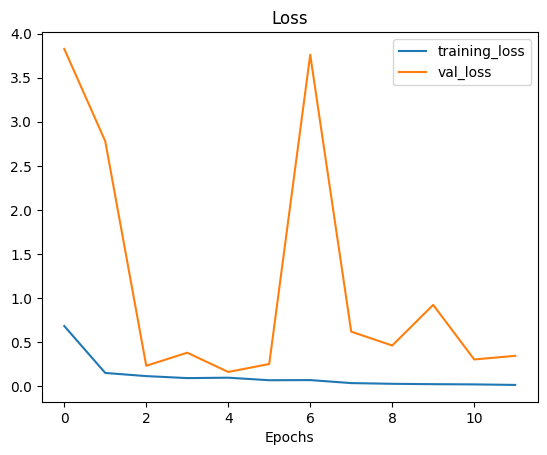

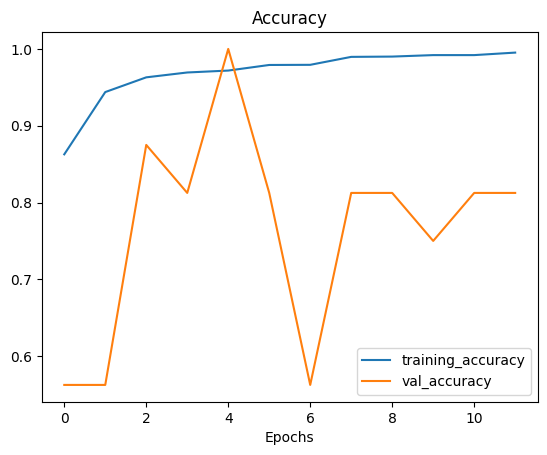

In [64]:
from helper_functions import *
plot_loss_curves(history)

In [65]:
model.evaluate(test)

20/20 [==============================] - 6s 308ms/step - loss: 2.4935 - accuracy: 0.7564


[2.4934794902801514, 0.7564102411270142]

In [66]:
model.save('Pnumonia_model.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
